In [24]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder


In [25]:
#Load the dataset and print a sample number of rows.
# Load the dataset
insurance_data = pd.read_csv("insurance.csv")
# Print a sample number of rows
sample_rows = insurance_data.sample(5)
print("Sample of Rows:")
print(sample_rows)


Sample of Rows:
      Age  Gender   BMI  Children Smoker     Region  Expenses
1235   26    male   NaN         0     no  northwest   2699.57
840    21    male  31.1         0     no  southwest   1526.31
105    20    male  28.0         1    yes  northwest  17560.38
508    24  female  25.3         0     no  northeast   3044.21
338    50    male  32.3         1    yes  northeast  41919.10


In [26]:
#Find the number of rows with any missing values. Remove any row with a missing value.
#Find the number of rows with any missing values.
rows_with_missing_values = insurance_data[insurance_data.isnull().any(axis=1)]
print("Number of rows with missing values:", len(rows_with_missing_values))

#Remove any row with a missing value.
insurance_data = insurance_data.dropna()

Number of rows with missing values: 17


In [27]:
#Convert 'Gender', 'Smoker', and 'Region' into numerical values suitable for regression analysis

## Using one-hot encoding for 'Region' and binary encoding for 'sex' and 'smoker'
encoder = ColumnTransformer(
    transformers=[
        ('gender', OrdinalEncoder(categories=[['female', 'male']]), ['Gender']),
        ('smoker', OrdinalEncoder(categories=[['no', 'yes']]), ['Smoker']),
        ('region', OneHotEncoder(), ['Region'])
    ],
    remainder='passthrough'
)
insurance_data_encoded = pd.DataFrame(encoder.fit_transform(insurance_data), columns=encoder.get_feature_names_out(insurance_data.columns))
print(insurance_data_encoded.head())


   gender__Gender  smoker__Smoker  region__Region_northeast  \
0             0.0             1.0                       0.0   
1             1.0             0.0                       0.0   
2             1.0             0.0                       0.0   
3             1.0             0.0                       0.0   
4             1.0             0.0                       0.0   

   region__Region_northwest  region__Region_southeast  \
0                       0.0                       0.0   
1                       0.0                       1.0   
2                       0.0                       1.0   
3                       1.0                       0.0   
4                       1.0                       0.0   

   region__Region_southwest  remainder__Age  remainder__BMI  \
0                       1.0            19.0            27.9   
1                       0.0            18.0            33.8   
2                       0.0            28.0            33.0   
3                       0.

In [28]:
#Normalize the features using Min-Max scaling.
scaler = MinMaxScaler()
insurance_data_normalized = pd.DataFrame(scaler.fit_transform(insurance_data_encoded), columns=insurance_data_encoded.columns)
print(insurance_data_normalized.head())

   gender__Gender  smoker__Smoker  region__Region_northeast  \
0             0.0             1.0                       0.0   
1             1.0             0.0                       0.0   
2             1.0             0.0                       0.0   
3             1.0             0.0                       0.0   
4             1.0             0.0                       0.0   

   region__Region_northwest  region__Region_southeast  \
0                       0.0                       0.0   
1                       0.0                       1.0   
2                       0.0                       1.0   
3                       1.0                       0.0   
4                       1.0                       0.0   

   region__Region_southwest  remainder__Age  remainder__BMI  \
0                       1.0        0.021739        0.320755   
1                       0.0        0.000000        0.479784   
2                       0.0        0.217391        0.458221   
3                       0.

In [29]:
# Divide the data into “features” and “target” subsets.
features = insurance_data_normalized.drop('remainder__Expenses', axis=1) # Features: All columns except 'Expenses'
target = insurance_data_normalized['remainder__Expenses'] # Target: 'Expenses' column

# Split the data into training and testing subsets
# Here, I'm using a 80/20 split
# it means that 80% of the data will be used for training model, and the remaining 20% will be used for testing the model's performance.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

# Display the shapes of the resulting subsets
print(f"\nShapes of subsets:")
print(f"X_train shape: {X_train.shape}") #feature train
print(f"X_test shape: {X_test.shape}")   #feature test
print(f"y_train shape: {y_train.shape}") #target train
print(f"y_test shape: {y_test.shape}")   #target test


Shapes of subsets:
X_train shape: (1056, 9)
X_test shape: (265, 9)
y_train shape: (1056,)
y_test shape: (265,)


In [30]:
#exponential decay
#Learning Rate  = Initial Learning Rate/1+Decay Rate×Iteration Number
#np.c --> concatenate array
#np.ones ---> make a matrix with rows and colums having only 1's.
#x = [1, 2, 3, 4, 5]
#y = [2, 4, 6, 8, 10]

#plt.plot(x, y)


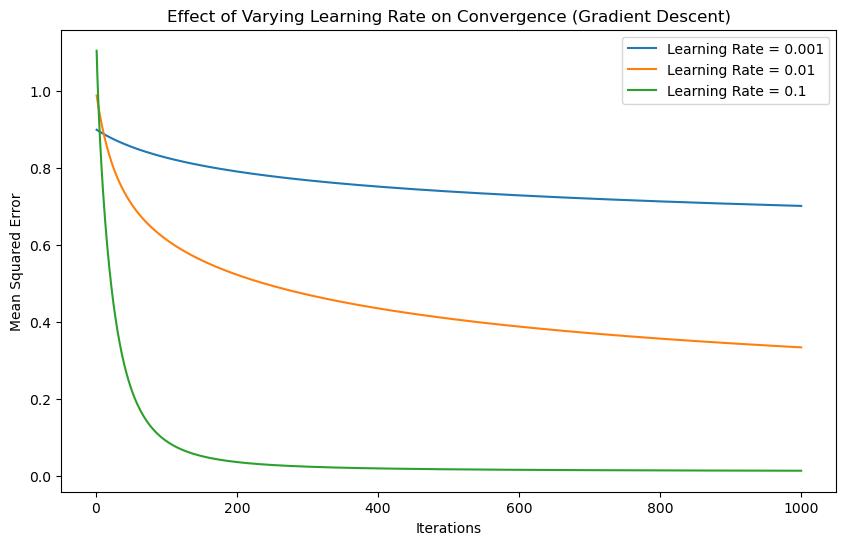

In [31]:
# Convert y_train to NumPy array
y_train_np = np.array(y_train)

# Gradient Descent
def gradient_descent(X_train_b, y_train, alpha, n_iterations):
    m = X_train_b.shape[0]
    n_features = X_train_b.shape[1]
    W = np.random.randn(n_features, 1)
    loss = []
    decay_rate = 0.01  # Decay rate
    for iteration in range(n_iterations):
        alpha_decay = alpha / (1 + decay_rate * iteration)  # Exponential decay
        gradients = 1/m * X_train_b.T.dot(X_train_b.dot(W) - y_train[:, np.newaxis])
        W = W - alpha_decay * gradients
        predictions = X_train_b.dot(W)
        loss.append(mean_squared_error(y_train, predictions))

    return loss

# Varying learning rates
learning_rates = [0.001, 0.01, 0.1]
n_iterations = 1000

plt.figure(figsize=(10, 6))
for alpha in learning_rates:
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] ## Add a column of ones to the train(features) set.
    n_features = X_b.shape[1]
    W = np.random.randn(n_features, 1)
    start_time = time.time()
    loss = gradient_descent(X_b, y_train_np, alpha, n_iterations)
    end_time = time.time()
    plt.plot(range(1, n_iterations + 1), loss, label=f'Learning Rate = {alpha}')
gradient_descent_time = end_time - start_time
plt.title('Effect of Varying Learning Rate on Convergence (Gradient Descent)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [32]:
# Add a column of ones to the test set.
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Predict expenses using the trained model
predictions_gradient = X_test_b.dot(W).ravel()

In [33]:
# Linear Regression from scikit-learn
start_time = time.time()

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
predictions_linear_reg = linear_reg_model.predict(X_test)

end_time = time.time()
linear_regression_time = end_time - start_time

In [34]:
# Normal Equation
start_time = time.time()

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

theta_normal_eq = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_np)
predictions_normal_eq = X_test_b.dot(theta_normal_eq)

end_time = time.time()
normal_equation_time = end_time - start_time


In [35]:
# Calculate MAE and MSE
mae_gradient_descent = mean_absolute_error(y_test, predictions_gradient)
mse_gradient_descent = mean_squared_error(y_test, predictions_gradient)

mae_linear_reg = mean_absolute_error(y_test, predictions_linear_reg)
mse_linear_reg = mean_squared_error(y_test, predictions_linear_reg)

mae_normal_eq = mean_absolute_error(y_test, predictions_normal_eq)
mse_normal_eq = mean_squared_error(y_test, predictions_normal_eq)


In [36]:
print("\nComparison of Solutions:")
print(f"MAE (Gradient Descent): {mae_gradient_descent}")
print(f"MSE (Gradient Descent): {mse_gradient_descent}")
print(f"Computational Time (Gradient Descent): {gradient_descent_time:.4f} seconds\n")

print(f"MAE (Linear Regression): {mae_linear_reg}")
print(f"MSE (Linear Regression): {mse_linear_reg}")
print(f"Computational Time (Linear Regression): {linear_regression_time:.4f} seconds\n")

print(f"MAE (Normal Equation): {mae_normal_eq}")
print(f"MSE (Normal Equation): {mse_normal_eq}")
print(f"Computational Time (Normal Equation): {normal_equation_time:.4f} seconds\n")



Comparison of Solutions:
MAE (Gradient Descent): 0.9899742433107207
MSE (Gradient Descent): 1.4355745147611263
Computational Time (Gradient Descent): 1.3936 seconds

MAE (Linear Regression): 0.07322090456300645
MSE (Linear Regression): 0.010997654911521038
Computational Time (Linear Regression): 0.0081 seconds

MAE (Normal Equation): 0.2520891234248898
MSE (Normal Equation): 0.08121139853953759
Computational Time (Normal Equation): 0.0042 seconds



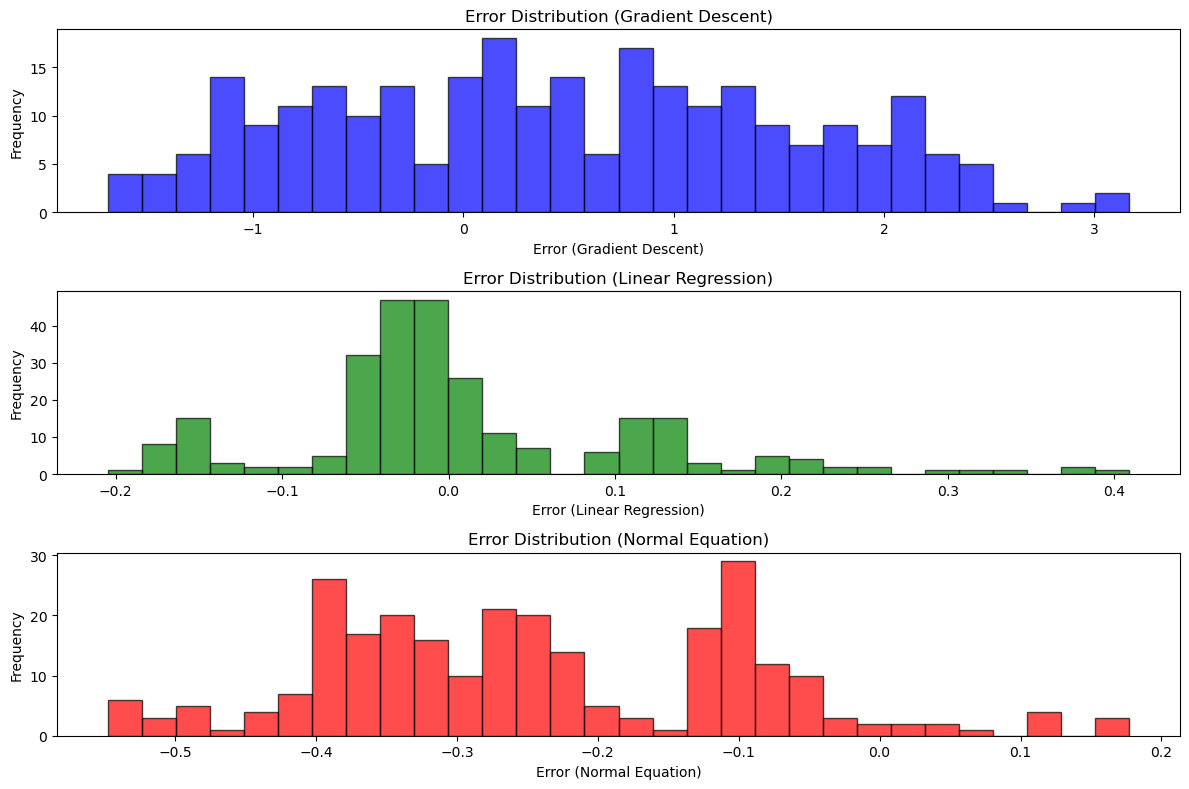

In [37]:
# Calculate errors
error_gradient_descent = y_test - predictions_gradient
error_linear_reg = y_test - predictions_linear_reg
error_normal_eq = y_test - predictions_normal_eq
# Plot histograms
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(error_gradient_descent, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Error (Gradient Descent)')
plt.ylabel('Frequency')
plt.title('Error Distribution (Gradient Descent)')

plt.subplot(3, 1, 2)
plt.hist(error_linear_reg, bins=30, edgecolor='black', color='green', alpha=0.7)
plt.xlabel('Error (Linear Regression)')
plt.ylabel('Frequency')
plt.title('Error Distribution (Linear Regression)')

plt.subplot(3, 1, 3)
plt.hist(error_normal_eq, bins=30, edgecolor='black', color='red', alpha=0.7)
plt.xlabel('Error (Normal Equation)')
plt.ylabel('Frequency')
plt.title('Error Distribution (Normal Equation)')

plt.tight_layout()
plt.show()